# MODELO DE PREDICCIÓN DE COSTES PARA VEHÍCULOS USADOS

## Procesos ETL

### 1. Extracción de datos para el modelo de predicción

El dataset está publicado en la web de contenidos para data science KAGGLE en formato csv. 

Importamos todas las librerías que vamos a ir necesitando para la modelización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

# preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import pandas_profiling as pp
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer  
from sklearn.impute import SimpleImputer 

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

### 2. Carga dataset

Comprobamos que el archivo esté en formato correcto (csv) y que las características de la carga se acoplan al archivo (delimitador, formato numérico..., fechas...)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [3]:
df_used_cars = pd.read_csv("coches-de-segunda-mano-sample.csv", sep=",", nrows=200)
df_used_cars.head(30)

url  \
0                    e158ae0ca53119ca199c28c36b5c2fcd   
1                    ff267ebb7e700246f47f84f3db660b4b   
2                    de4b02db28ea7786c622b969be10c7c7   
3                    0449972a4d07594acf92e9a7dd28b39c   
4   12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad...   
5                    f15e9a256de698bf0588753e7add0fdf   
6                    517b8f7c488d9d4645f76b1611418a4e   
7                    2ad681959d278f32a83c3ad7be35443e   
8                    3cb810cd0cd871eb6d5c38832f5f8beb   
9                    13b881bdd31a0387edd64edd726e8c93   
10                   24493d316fdbd736dab7162c09f9d582   
11                   8dadc0a13657e83e90a972e74456f701   
12                   254023385c971f3854bbbb2f65b475e8   
13                   d03d85ad44554bc8dacd08daf46545c9   
14                   2e6ffb51e1ddb2db51d3cf56a4406f6c   
15                   6097cfb5b8be0043f13985bcedf618dc   
16                   e932482f173d818d7fc24139fe2228c3   
17                   c6667dcec968a61d61ab9bd5c0211d04   
18                   32f95c9f45049d91bd1dcbfc078f6b2b   
19                   009f2a360a160de1e263e62d30328df4   
20                   22e864a4d2e38395c05f694c11e14371   
21                   e8c7dcf40729c20d07ef4bb1b7e0a20c   
22                   36bff53e200bb7b9b6415776af58a5f7   
23                   ad1cd419582b0ee1617498592ba55dd8   
24                   45388c13256ff7bfac38f6998e4843f4   
25                   160d4ccb1db515e21ea4ef1ffe5e9500   
26                   9ab0d281cc6b92962cd4e226ba7d2be8   
27                   78350ba98ed7adebffbfd277357ae01a   
28                   d94dbb4ca67c8a6a272230944dc4d9aa   
29                   e990d0d013d9e9c9431dc1cb17a20097   

                             company           make            model  \
0   9881bcdd5a0ad4733037b3fb25e69c3a           SEAT           Toledo   
1   9881bcdd5a0ad4733037b3fb25e69c3a        CITROEN               C1   
2   9881bcdd5a0ad4733037b3fb25e69c3a           FORD  Transit Connect   
3   9881bcdd5a0ad4733037b3fb25e69c3a     VOLKSWAGEN        Caravelle   
4                                NaN            NaN              NaN   
5   9881bcdd5a0ad4733037b3fb25e69c3a        PEUGEOT             3008   
6   9881bcdd5a0ad4733037b3fb25e69c3a     LAND-ROVER  Discovery Sport   
7   9881bcdd5a0ad4733037b3fb25e69c3a          HONDA            Civic   
8   9881bcdd5a0ad4733037b3fb25e69c3a        CITROEN         Berlingo   
9   9881bcdd5a0ad4733037b3fb25e69c3a         NISSAN             NOTE   
10  9881bcdd5a0ad4733037b3fb25e69c3a        CITROEN         Berlingo   
11  9881bcdd5a0ad4733037b3fb25e69c3a     VOLKSWAGEN             Golf   
12  9881bcdd5a0ad4733037b3fb25e69c3a     VOLKSWAGEN             Polo   
13  9881bcdd5a0ad4733037b3fb25e69c3a  MERCEDES-BENZ         Clase CL   
14  9881bcdd5a0ad4733037b3fb25e69c3a           FIAT            Panda   
15  9881bcdd5a0ad4733037b3fb25e69c3a          SKODA          Octavia   
16  9881bcdd5a0ad4733037b3fb25e69c3a            BMW          Serie 3   
17  9881bcdd5a0ad4733037b3fb25e69c3a        CITROEN         C-Elysée   
18  9881bcdd5a0ad4733037b3fb25e69c3a          MAZDA           Mazda5   
19  9881bcdd5a0ad4733037b3fb25e69c3a            BMW          Serie 1   
20  9881bcdd5a0ad4733037b3fb25e69c3a           FIAT            Doblò   
21  9881bcdd5a0ad4733037b3fb25e69c3a           FORD            C-Max   
22  9881bcdd5a0ad4733037b3fb25e69c3a        CITROEN               C3   
23  9881bcdd5a0ad4733037b3fb25e69c3a     VOLKSWAGEN          Phaeton   
24  9881bcdd5a0ad4733037b3fb25e69c3a            BMW          Serie 1   
25  9881bcdd5a0ad4733037b3fb25e69c3a           OPEL            Astra   
26  9881bcdd5a0ad4733037b3fb25e69c3a           AUDI               A3   
27  9881bcdd5a0ad4733037b3fb25e69c3a          VOLVO             XC60   
28  9881bcdd5a0ad4733037b3fb25e69c3a     MITSUBISHI              ASX   
29  9881bcdd5a0ad4733037b3fb25e69c3a           FORD            Focus   

                                              ver

In [4]:
df_used_cars.columns

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')

In [5]:
#check formatos por variable
df_used_cars.dtypes

url                 object
company             object
make                object
model               object
version             object
price              float64
price_financed     float64
fuel                object
year               float64
kms                float64
power              float64
doors              float64
shift               object
color               object
photos             float64
is_professional     object
dealer              object
province            object
country             object
publish_date        object
insert_date         object
dtype: object

### 3. Transformaciones necesarias del dataset

In [6]:
#creamos una lista con las variables fecha
dates = ["publish_date", "insert_date"]

#cargamos el fichero con los datos obviando los primeros 26 registros
df_used_cars = pd.read_csv("coches-de-segunda-mano-sample.csv", sep=",", parse_dates=dates)
df_used_cars.head()

#eliminamos en timestamp de la columna "posting_date" al considerarlo información irrelevante
df_used_cars['publish_date'] =  pd.to_datetime(df_used_cars['publish_date'], infer_datetime_format=True, utc=True)
df_used_cars['publish_date'] =  pd.to_datetime(df_used_cars['publish_date']).dt.date
df_used_cars['insert_date'] =  pd.to_datetime(df_used_cars['insert_date'], infer_datetime_format=True, utc=True)
df_used_cars['insert_date'] =  pd.to_datetime(df_used_cars['insert_date']).dt.date


In [7]:
#transformamos a fecha las variables correspondientes y eliminamos el timestamp
df_used_cars['publish_date'] =  pd.to_datetime(df_used_cars['publish_date'], infer_datetime_format=True, utc=True)
df_used_cars['insert_date'] =  pd.to_datetime(df_used_cars['insert_date'], infer_datetime_format=True, utc=True)
df_used_cars['publish_date'] =  pd.to_datetime(df_used_cars['publish_date']).dt.date
df_used_cars['insert_date'] =  pd.to_datetime(df_used_cars['insert_date']).dt.date

## Procesos EDA (Exploratory Data Analysis)

In [8]:
#comprobamos el % de NaN por variable
df_used_cars.isnull().sum() / df_used_cars.shape[0]

url                0.00000
company            0.01588
make               0.01592
model              0.01598
version            0.01588
price              0.01588
price_financed     0.54224
fuel               0.01678
year               0.01592
kms                0.01588
power              0.18642
doors              0.01588
shift              0.01810
color              0.02766
photos             0.01588
is_professional    0.01588
dealer             0.01588
province           0.01600
country            0.01588
publish_date       0.01588
insert_date        0.01588
dtype: float64

In [9]:
#eliminamos las variables innecesarias del dataframe para nuestro modelo según su alto índice de nulos o por irrelevancia en el modelo
df_used_cars = df_used_cars.drop(["url", 'company', 'price_financed', "country", "publish_date", "insert_date"], axis=1)
df_used_cars.head()

make            model  \
0        SEAT           Toledo   
1     CITROEN               C1   
2        FORD  Transit Connect   
3  VOLKSWAGEN        Caravelle   
4         NaN              NaN   

                                             version    price      fuel  \
0                                   SEAT Toledo  4p.    950.0    Diésel   
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200.0  Gasolina   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851.0    Diésel   
3  VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...  19426.0    Diésel   
4                                                NaN      NaN       NaN   

     year       kms  power  doors   shift   color  photos is_professional  \
0  2000.0  227000.0    NaN    4.0  Manual   Verde     5.0           False   
1  2017.0   50071.0   82.0    5.0  Manual  Blanco     6.0            True   
2  2016.0  103000.0  100.0    4.0  Manual  Blanco    10.0            True   
3  2014.0  120000.0  140.0    4.0  Manual  Blanco     9.0            True   
4     NaN       NaN    NaN    NaN     NaN     NaN     NaN             NaN   

                             dealer   province  
0  0f4bb8455d27349b8273109b66a847f3    Navarra  
1                     Autos Raymara   Tenerife  
2                           Auto 96  Barcelona  
3                          Inniauto    Navarra  
4                               NaN        NaN

In [10]:
df_used_cars.shape

(50000, 15)

In [11]:
#eliminamos los registros con variables sin informar
df_used_cars_clean = df_used_cars.dropna()
df_used_cars_clean.shape

(40457, 15)

Perdemos un 19% de registros de nuestros dataset si eliminamos filas con alguna variable sin informar. Procedemos de esta manera ya que no se pierde gran información del dataset y nos facilita mucho la implementación de todos los modelos.

In [12]:
#transformamos a enteros las variables correspondintes
df_used_cars_clean['price'] = df_used_cars_clean['price'].astype(int)
df_used_cars_clean['year'] = df_used_cars_clean['year'].astype(int)
df_used_cars_clean['kms'] = df_used_cars_clean['kms'].astype(int)
df_used_cars_clean['power'] = df_used_cars_clean['power'].astype(int)
df_used_cars_clean['doors'] = df_used_cars_clean['doors'].astype(int)
df_used_cars_clean['photos'] = df_used_cars_clean['photos'].astype(int)

In [13]:
df_used_cars_clean.head()

make            model  \
1     CITROEN               C1   
2        FORD  Transit Connect   
3  VOLKSWAGEN        Caravelle   
5     PEUGEOT             3008   
6  LAND-ROVER  Discovery Sport   

                                             version  price      fuel  year  \
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200  Gasolina  2017   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851    Diésel  2016   
3  VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...  19426    Diésel  2014   
5         PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.  11490  Gasolina  2016   
6  LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...  28500    Diésel  2017   

      kms  power  doors       shift   color  photos is_professional  \
1   50071     82      5      Manual  Blanco       6            True   
2  103000    100      4      Manual  Blanco      10            True   
3  120000    140      4      Manual  Blanco       9            True   
5   78665    130      5      Manual  Blanco      32            True   
6   36238    150      5  Automático  Blanco      47            True   

           dealer   province  
1   Autos Raymara   Tenerife  
2         Auto 96  Barcelona  
3        Inniauto    Navarra  
5  Flexicar Rivas     Madrid  
6         OK Cars   Baleares

### Analizamos la variable que queremos predecir para ver su distribución y posibles outliers

<AxesSubplot:xlabel='price', ylabel='Density'>

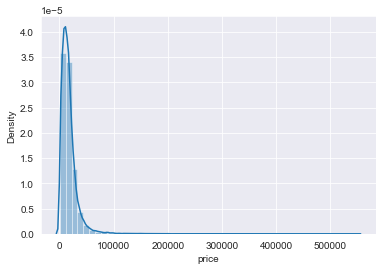

In [14]:
sns.set_style('darkgrid')
sns.distplot(df_used_cars_clean["price"])

<AxesSubplot:xlabel='price', ylabel='Density'>

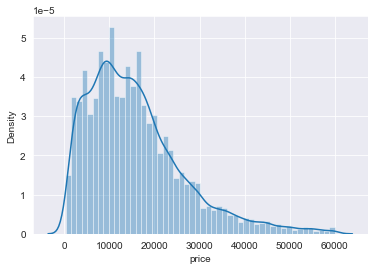

In [15]:
sns.set_style('darkgrid')
sns.distplot(df_used_cars_clean.loc[df_used_cars_clean.price < 60000, 'price'])

   label  lower_whisker  lower_quartile   median  upper_quartile  \
0  price          300.0          7990.0  13990.0         21500.0   

   upper_whisker  
0        41750.0  


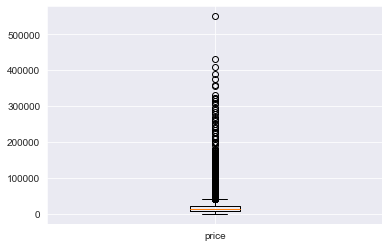

In [16]:
def get_box_plot_data(labels, bp):

    rows_list = []

    for i in range(len(labels)):

        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['price']
bp = plt.boxplot(df_used_cars_clean["price"], labels=labels)
print(get_box_plot_data(labels, bp))

plt.show()

In [17]:
outliers = df_used_cars_clean[df_used_cars_clean["price"] > 41750]
outliers.groupby("make").agg({"price":["mean", "count"]}).sort_values([("price","mean")], ascending=False)

price      
                        mean count
make                              
LAMBORGHINI    252112.375000     8
FERRARI        161975.185185    27
BENTLEY        152916.809524    21
ASTON MARTIN    89578.666667    15
PORSCHE         82588.097720   307
CORVETTE        74000.000000     1
NISSAN          72479.833333     6
RENAULT         67900.000000     1
MASERATI        66292.425532    47
AUDI            66080.121622   222
ALPINE          66000.000000     1
MERCEDES-BENZ   62902.998227   564
LAND-ROVER      60839.308140   172
BMW             59363.688963   299
SUBARU          58600.000000     3
JAGUAR          56658.745763    59
TESLA           56398.950000    20
CHEVROLET       52130.000000     3
JEEP            51764.807692    26
VOLKSWAGEN      51300.800000    45
FORD            50953.076923    13
SUZUKI          50414.111111     9
LEXUS           50141.200000    25
VOLVO           50106.170000   100
IVECO           50000.000000     1
ISUZU           49590.000000     1
DS              48786.500000    12
ALFA ROMEO      48548.947368    19
MINI            48114.000000     5
TOYOTA          47742.222222     9
SKODA           46545.000000     2
KIA             45672.500000     4
FIAT            45250.000000     2
CUPRA           45047.500000     4
HYUNDAI         44574.000000     5
PEUGEOT         43225.000000     6
OPEL            43022.500000     4
CITROEN         42816.666667     3
HONDA           41990.000000     1

Vemos que la variable a predecir "Precio" para valores superiores a 41.750€ podrían considerarse como Outliers o anomalías según por ejemplo el diagrama de caja y bigotes. Considerando eliminar dichos registros con precios superiores, decidimos dejarlos ya que tomando en cuenta la naturaleza de los vehículos registrados y que en este dataset las marcas superpremium (Lamborghini, Ferrari, Porsche, etc...) pueden ser registros válidos.

Realizamos un profiling para comprobar que nos cuadran todas las variables a nivel de rangos, outliers, distribuciones, estadísticos básicos...

In [18]:
df_used_cars_clean.describe()

price          year           kms         power         doors  \
count   40457.000000  40457.000000  4.045700e+04  40457.000000  40457.000000   
mean    17266.001088   2013.799021  9.885231e+04    146.549102      4.519959   
std     17060.213665      5.776327  8.276351e+04     71.269244      0.856614   
min       300.000000   1980.000000  0.000000e+00     29.000000      2.000000   
25%      7990.000000   2010.000000  3.000000e+04    109.000000      4.000000   
50%     13990.000000   2016.000000  8.594800e+04    130.000000      5.000000   
75%     21500.000000   2018.000000  1.480000e+05    163.000000      5.000000   
max    549900.000000   2021.000000  2.650000e+06    800.000000      5.000000   

             photos  
count  40457.000000  
mean      18.567862  
std       12.191567  
min        0.000000  
25%        9.000000  
50%       15.000000  
75%       26.000000  
max       54.000000

Vemos que la variable "year" que contiene los valores del año de fabricación, puede tener un valor mínimo de 1980. Consideramos que estas décadas pueden afectar al modelo por lo que prodecemos a extraer valores de años de fabricación menores al 2000 ya que predecir precios de vehículos con más de 20 años puede no ser un objetivo realista.

De igual modo ocurre con vehículos de más de 250.000km. Un valor superior de esta variable comienza a identificar al vehículo como poco predecible.

In [19]:
#eliminamos los registros con año < 2000 y kms > 250.000km
df_used_cars_clean = df_used_cars_clean[df_used_cars_clean["year"] >= 2000]
df_used_cars_clean = df_used_cars_clean[df_used_cars_clean["kms"] <= 250000]

In [20]:
df_used_cars_clean.describe()

price          year            kms         power         doors  \
count   37842.000000  37842.000000   37842.000000  37842.000000  37842.000000   
mean    18057.640902   2014.579039   87123.916495    146.943845      4.549416   
std     17186.056133      4.845233   66471.467165     72.073702      0.838039   
min       300.000000   2000.000000       0.000000     41.000000      2.000000   
25%      8900.000000   2012.000000   27530.000000    109.000000      4.000000   
50%     14900.000000   2016.000000   79944.500000    130.000000      5.000000   
75%     22000.000000   2018.000000  135000.000000    163.000000      5.000000   
max    549900.000000   2021.000000  250000.000000    800.000000      5.000000   

             photos  
count  37842.000000  
mean      19.080017  
std       12.227210  
min        0.000000  
25%       10.000000  
50%       16.000000  
75%       27.000000  
max       54.000000

In [21]:
pp.ProfileReport(df_used_cars_clean)

Render HTML: 100%|██████████| 1/1 [00:06<00:00,  6.44s/it]


## Feature Engineering (transformaciones del dataset para la optimización del modelo) & DataPreprocessing

In [22]:
#agrupamos la variable kilómetros ya que una pequeña diferencia en esta variable no tiene ningún efecto en la predicción y el modelo puede asemejar cantidades más fácilmente
df_used_cars_clean['kms'] = df_used_cars_clean['kms'] // 5000

In [23]:
#aplanamos el campo año
df_used_cars_clean['year'] = (df_used_cars_clean['year']-2000)

In [24]:
df_used_cars_clean.head()

make            model  \
1     CITROEN               C1   
2        FORD  Transit Connect   
3  VOLKSWAGEN        Caravelle   
5     PEUGEOT             3008   
6  LAND-ROVER  Discovery Sport   

                                             version  price      fuel  year  \
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200  Gasolina    17   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851    Diésel    16   
3  VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...  19426    Diésel    14   
5         PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.  11490  Gasolina    16   
6  LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...  28500    Diésel    17   

   kms  power  doors       shift   color  photos is_professional  \
1   10     82      5      Manual  Blanco       6            True   
2   20    100      4      Manual  Blanco      10            True   
3   24    140      4      Manual  Blanco       9            True   
5   15    130      5      Manual  Blanco      32            True   
6    7    150      5  Automático  Blanco      47            True   

           dealer   province  
1   Autos Raymara   Tenerife  
2         Auto 96  Barcelona  
3        Inniauto    Navarra  
5  Flexicar Rivas     Madrid  
6         OK Cars   Baleares

In [25]:
df_used_cars_clean.shape

(37842, 15)

Finalmente, el dataset que vamos a explotar, tendrá unos 38.000 registros y 15 variables.

### Label Encoding (Tree-Based models for classification predictive modeling)

In [26]:
train0tree = df_used_cars_clean

In [27]:
# Identificamos las variables categóricas
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0tree.columns.values.tolist()
for col in features:
    if train0tree[col].dtype in numerics: continue
    categorical_columns.append(col)

# Label Encoding de las variables categóricas
for col in categorical_columns:
    if col in train0tree.columns:
        le = LabelEncoder()
        le.fit(list(train0tree[col].astype(str).values))
        train0tree[col] = le.transform(list(train0tree[col].astype(str).values))

In [28]:
df_used_cars_clean.head()

make  model  version  price  fuel  year  kms  power  doors  shift  color  \
1    10    118     2246   6200     4    17   10     82      5      1    834   
2    21    681     4665   7851     0    16   20    100      4      1    834   
3    64    162    13639  19426     0    14   24    140      4      1    834   
5    48     16     9652  11490     4    16   15    130      5      1    834   
6    34    249     6140  28500     0    17    7    150      5      0    834   

   photos  is_professional  dealer  province  
1       6                1    3718        42  
2      10                1    2945         7  
3       9                1    5172        33  
5      32                1    4679        29  
6      47                1    5990         6

### One-Hot Encoding (Non Tree-Based models)

In [29]:
# One-Hot Encoding de las variables categóricas
train0nontree = df_used_cars_clean

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(train0nontree)
train0nontree = onehot_encoder.transform(train0nontree)

### Split Train-Test

In [30]:
target_name = 'price'
train_target0tree = train0tree[target_name]
train0tree = train0tree.drop([target_name], axis=1)

In [31]:
train0tree.shape

(37842, 14)

In [32]:
# separamos el train y test
train, test, train_target, test_target = train_test_split(train0tree, train_target0tree, test_size=0.2, random_state=0)

In [33]:
train0tree.shape, train.shape

((37842, 14), (30273, 14))

In [34]:
valid_part = 0.3
# para modelos boosting
train0b = train0tree
train_target0b = train_target0tree
# separamos el train y test para boosting
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [35]:
#Escalamos las variables para que no penalicen valores de mayor dimensión en modelos como regresores lineales (no árboles) ya que al no hacerlo podría confundir al modelo y darle más relevancia a variables por el mero hecho de tener más dimensión 
scaler = StandardScaler()
train0_scaled = pd.DataFrame(scaler.fit_transform(train0tree), columns = train0tree.columns)

train_scaled, test_scaled, target, target_test  = train_test_split(train0_scaled, train_target0tree, test_size=0.2, random_state=0)

In [36]:
train = train_scaled 
test = test_scaled

In [37]:
train.shape, test.shape, target.shape, target_test.shape

((30273, 14), (7569, 14), (30273,), (7569,))

In [38]:
train.head(3)

make     model   version      fuel      year       kms     power  \
37173  0.746639 -0.681229  0.773270  1.177656  0.912447 -1.054757 -0.790088   
16487  0.551164 -1.162537  0.263973  1.177656  0.912447 -1.129941 -0.581965   
21213  0.942114  0.032137  1.084252 -0.796468  0.293274 -0.227726 -0.790088   

          doors     shift     color    photos  is_professional    dealer  \
37173  0.537672  0.728663  1.128736 -0.579045         0.489431  0.902387   
16487  0.537672  0.728663  0.021937  0.075242         0.489431  0.172174   
21213  0.537672  0.728663  0.021937 -0.333688         0.489431  0.591837   

       province  
37173 -1.252142  
16487 -0.373656  
21213  0.437253

In [39]:
test.head(3)

make     model   version      fuel      year       kms     power  \
10391  1.381932 -0.139758  1.525077  1.177656 -0.119509  0.524121  2.123634   
15339 -1.256977  0.079408 -1.008352 -0.796468  0.499665 -0.227726  0.181152   
10544 -1.550190 -1.287161 -1.455818 -0.796468  0.293274 -0.453279  0.597399   

          doors     shift     color    photos  is_professional    dealer  \
10391 -1.848883 -1.372377 -1.389949 -1.478690         0.489431  0.036833   
15339 -0.655606  0.728663 -0.387521  0.402385         0.489431 -0.337716   
10544  0.537672 -1.372377 -0.751102  2.855962         0.489431  0.965861   

       province  
10391 -1.252142  
15339  0.234526  
10544  1.248163

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30273 entries, 37173 to 2732
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             30273 non-null  float64
 1   model            30273 non-null  float64
 2   version          30273 non-null  float64
 3   fuel             30273 non-null  float64
 4   year             30273 non-null  float64
 5   kms              30273 non-null  float64
 6   power            30273 non-null  float64
 7   doors            30273 non-null  float64
 8   shift            30273 non-null  float64
 9   color            30273 non-null  float64
 10  photos           30273 non-null  float64
 11  is_professional  30273 non-null  float64
 12  dealer           30273 non-null  float64
 13  province         30273 non-null  float64
dtypes: float64(14)
memory usage: 3.5 MB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7569 entries, 10391 to 27020
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             7569 non-null   float64
 1   model            7569 non-null   float64
 2   version          7569 non-null   float64
 3   fuel             7569 non-null   float64
 4   year             7569 non-null   float64
 5   kms              7569 non-null   float64
 6   power            7569 non-null   float64
 7   doors            7569 non-null   float64
 8   shift            7569 non-null   float64
 9   color            7569 non-null   float64
 10  photos           7569 non-null   float64
 11  is_professional  7569 non-null   float64
 12  dealer           7569 non-null   float64
 13  province         7569 non-null   float64
dtypes: float64(14)
memory usage: 887.0 KB


In [42]:
#creamos las listas con las métricas que vamos a utilizar para valorar los modelos según su precisión
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [43]:
#definimos la función acc_d que nos calcule el Error absoluto medio  (Mean Abs Error) entre el valor real y el predicho
def acc_d(y_meas, y_pred):
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

#definimos la función acc_rmse que nos calcule la raíz del Error cuadrátrico medio (Root Mean Squared Error) entre el valor real y el predicho
def acc_rmse(y_meas, y_pred):
    return (math.sqrt(mean_squared_error(y_meas, y_pred)))

In [44]:
#definimos la función acc_boosting_model que nos devolverá las distintas métricas para estos modelos
def acc_boosting_model(num,model,train,test,num_iteration=0):

    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain), 3)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain), 3)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain), 3)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest), 3)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest), 3)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest), 3)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [45]:
#de igual modo que hemos hecho para el boosting pero ahora para los modelos SKlearn
def acc_model(num,model,train,test): 
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain), 3)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain), 3)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain), 3)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest), 3)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest), 3)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest), 3)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [46]:
er + 3

NameError: name 'er' is not defined

## 5. Implementación de los modelos más relevantes adaptados a nuestro escenario <a class="anchor" id="5"></a>

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning, we can narrow down our choice of models to a few. These include:

- Linear Regression
- Support Vector Machines and Linear SVR
- Stochastic Gradient Descent, GradientBoostingRegressor, RidgeCV, BaggingRegressor
- Decision Tree Regression, Random Forest, XGBRegressor, LGBM, ExtraTreesRegressor
- MLPRegressor (Deep Learning)
- VotingRegressor

### 5.1 Linear Regression <a class="anchor" id="5.1"></a>

**Linear Regression** is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. Reference [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression).

Note the confidence score generated by the model based on our training dataset.

In [ ]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [15325.83572265 18037.63068713 11916.0077371  28284.91152192
  6889.3443277 ]
acc(r2_score) for train = 0.7
acc(relative error) for train = 0.27
acc(rmse) for train = 9286.46
target_test = [25900 17450 29900 14990 47500]
ytest = [41683.18050499 23323.55924394 27740.26063544 29295.47829735
 25086.73361253]
acc(r2_score) for test = 0.67
acc(relative error) for test = 0.26
acc(rmse) for test = 10533.65


### 5.2 Support Vector Machines <a class="anchor" id="5.2"></a>

**Support Vector Machines** are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

In [ ]:
# Support Vector Machines

svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [14958.2691378  15107.21656268 14243.71339753 15889.19866583
 14242.74939296]
acc(r2_score) for train = 0.01
acc(relative error) for train = 0.49
acc(rmse) for train = 16817.21
target_test = [25900 17450 29900 14990 47500]
ytest = [14955.4723347  15070.24387938 15536.26989431 15141.67090163
 16373.676764  ]
acc(r2_score) for test = 0.01
acc(relative error) for test = 0.5
acc(rmse) for test = 18160.68


### 5.3 Linear SVR <a class="anchor" id="5.3"></a>

**Linear SVR** is a similar to SVM method. Its also builds on kernel functions but is appropriate for unsupervised learning. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine#Support-vector_clustering_(svr).

In [ ]:
# Linear SVR

linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(2,linear_svr,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [12710.15315135 13764.63534774 10738.82724347 21958.12674373
  8096.04386699]
acc(r2_score) for train = 0.43
acc(relative error) for train = 0.3
acc(rmse) for train = 12736.33
target_test = [25900 17450 29900 14990 47500]
ytest = [22141.62821514 16039.96944483 21137.94928579 18050.44503967
 20551.7071255 ]
acc(r2_score) for test = 0.39
acc(relative error) for test = 0.31
acc(rmse) for test = 14205.4


### 5.4 MLPRegressor <a class="anchor" id="5.4"></a>

The **MLPRegressor** optimizes the squared-loss using LBFGS or stochastic gradient descent by the Multi-layer Perceptron regressor. Reference [Sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

Thanks to:
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
* https://stackoverflow.com/questions/44803596/scikit-learn-mlpregressor-performance-cap

In [ ]:
# MLPRegressor

mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, verbose=True, pre_dispatch='2*n_jobs')
mlp_GS.fit(train, target)
acc_model(3,mlp_GS,train,test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
target =  [13890 15500 10300 27690 10990]
ytrain =  [12408.72342358 14356.67910993  8250.74785728 27068.63798699
  8427.8970736 ]
acc(r2_score) for train = 0.83
acc(relative error) for train = 0.19
acc(rmse) for train = 7064.08
target_test = [25900 17450 29900 14990 47500]
ytest = [30824.95291123 18587.231843   27485.5594127  18064.45287762
 25805.50338317]
acc(r2_score) for test = 0.79
acc(relative error) for test = 0.2
acc(rmse) for test = 8426.5


### 5.5 Stochastic Gradient Descent <a class="anchor" id="5.5"></a>

**Stochastic gradient descent** (often abbreviated **SGD**) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in big data applications this reduces the computational burden, achieving faster iterations in trade for a slightly lower convergence rate. Reference [Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

In [ ]:
# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(4,sgd,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [14935.00355923 17804.18326782 11194.68706024 29248.28363152
  6416.19932319]
acc(r2_score) for train = 0.7
acc(relative error) for train = 0.27
acc(rmse) for train = 9324.76
target_test = [25900 17450 29900 14990 47500]
ytest = [43996.50023898 23550.83048319 28149.82625353 30664.48825141
 26306.76530216]
acc(r2_score) for test = 0.67
acc(relative error) for test = 0.27
acc(rmse) for test = 10531.57


### 5.6 Decision Tree Regressor <a class="anchor" id="5.6"></a>

This model uses a **Decision Tree** as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [ ]:
# Decision Tree Regression

decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(5,decision_tree,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [13890. 15500. 10300. 27690. 10990.]
acc(r2_score) for train = 1.0
acc(relative error) for train = 0.0
acc(rmse) for train = 27.44
target_test = [25900 17450 29900 14990 47500]
ytest = [25000. 20900. 29900. 13900. 45900.]
acc(r2_score) for test = 0.82
acc(relative error) for test = 0.17
acc(rmse) for test = 7705.24


### 5.7 Random Forest <a class="anchor" id="5.7"></a>

**Random Forest** is one of the most popular model. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators= [100, 300]) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

In [ ]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators': [100, 1000]}, cv=5)
#random_forest = RandomForestRegressor()
random_forest.fit(train, target)
print(random_forest.best_params_)

{'n_estimators': 1000}
target =  [13890 15500 10300 27690 10990]
ytrain =  [13666.51  15660.198 10135.148 28577.41  10165.018]
acc(r2_score) for train = 0.99
acc(relative error) for train = 0.04
acc(rmse) for train = 1916.11
target_test = [25900 17450 29900 14990 47500]
ytest = [27327.643 18895.265 28466.396 17767.093 40903.326]
acc(r2_score) for test = 0.9
acc(relative error) for test = 0.12
acc(rmse) for test = 5666.95


In [ ]:
acc_model(6,random_forest,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [13666.51  15660.198 10135.148 28577.41  10165.018]
acc(r2_score) for train = 0.99
acc(relative error) for train = 0.04
acc(rmse) for train = 1916.11
target_test = [25900 17450 29900 14990 47500]
ytest = [27327.643 18895.265 28466.396 17767.093 40903.326]
acc(r2_score) for test = 0.9
acc(relative error) for test = 0.12
acc(rmse) for test = 5666.95


### 5.8 XGB<a class="anchor" id="5.8"></a>

**XGBoost** is an ensemble tree method that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. XGBoost improves upon the base Gradient Boosting Machines (GBM) framework through systems optimization and algorithmic enhancements. Reference [Towards Data Science.](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

In [ ]:
xgb_clf = xgb.XGBRegressor(objective = 'reg:squarederror') 
parameters = {'n_estimators': [60, 100, 120, 140], 
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_boosting_model(7,xgb_reg,trainb,testb)

Best score: 0.895
Best parameters set: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.5}
target =  [13100 25990  3500 14990 52900]
ytrain =  [12996.2   29742.336  6769.174 14793.631 43454.695]
acc(r2_score) for train = 0.98
acc(relative error) for train = 0.09
acc(rmse) for train = 2282.61
target_test = [25900 17450 29900 14990 47500]
ytest = [30941.846 17926.734 27714.65  14589.718 39914.66 ]
acc(r2_score) for test = 0.91
acc(relative error) for test = 0.12
acc(rmse) for test = 5593.83


### 5.9 LGBM <a class="anchor" id="5.9"></a>

**Light GBM** is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithms. It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’. Reference [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/).

In [ ]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [ ]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11679
[LightGBM] [Info] Number of data points in the train set: 21191, number of used features: 14
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 18095.078005
Training until validation scores don't improve for 8000 rounds
[500]	valid_0's rmse: 4536.07
[1000]	valid_0's rmse: 4272.53
[1500]	valid_0's rmse: 4158.15
[2000]	valid_0's rmse: 4099.67
[2500]	valid_0's rmse: 4050.24
[3000]	valid_0's rmse: 4010.01
[3500]	valid_0's rmse: 3978.34
[4000]	valid_0's rmse: 3949.66
[

In [ ]:
acc_boosting_model(8,modelL,trainb,testb,modelL.best_iteration)

target =  [13100 25990  3500 14990 52900]
ytrain =  [13351.24249693 28786.54102113  4278.63482166 15007.20302405
 33339.98163582]
acc(r2_score) for train = 0.98
acc(relative error) for train = 0.06
acc(rmse) for train = 2111.92
target_test = [25900 17450 29900 14990 47500]
ytest = [27627.24941227 19145.08902537 28853.8664159  14523.3431093
 45494.5719652 ]
acc(r2_score) for test = 0.9
acc(relative error) for test = 0.11
acc(rmse) for test = 5762.72


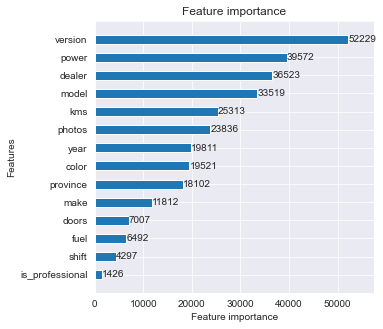

In [ ]:
#la libreria LGBM también puede mostrar las variables ordenadas según importancia
fig =  plt.figure(figsize = (5,5))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

### 5.10 GradientBoostingRegressor with HyperOpt<a class="anchor" id="5.10"></a>

Thanks to https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn

**Gradient Boosting** builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced. The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [ ]:
def hyperopt_gb_score(params):
    clf = GradientBoostingRegressor(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.8989827606232182
{'max_depth': 7, 'n_estimators': 350}
0.9013998844044806
{'max_depth': 2, 'n_estimators': 791}
0.8947791385689785
{'max_depth': 2, 'n_estimators': 476}
0.8993887439397857
{'max_depth': 2, 'n_estimators': 655}
0.916001085714484
{'max_depth': 5, 'n_estimators': 632}
0.9152231587551866
{'max_depth': 5, 'n_estimators': 512}
0.8997581702998364
{'max_depth': 7, 'n_estimators': 948}
0.8991351249217849
{'max_depth': 7, 'n_estimators': 738}
0.9065089374522209
{'max_depth': 6, 'n_estimators': 323}
0.8569427458163783
{'max_depth': 2, 'n_estimators': 116}
100%|██████████| 10/10 [1:05:50<00:00, 395.05s/trial, best loss: 0.8569427458163783]
best:
{'max_depth': 0, 'n_estimators': 16}


In [ ]:
params = space_eval(space_gb, best)
params

{'max_depth': 2, 'n_estimators': 116}

In [ ]:
# Gradient Boosting Regression

gradient_boosting = GradientBoostingRegressor(**params)
gradient_boosting.fit(train, target)
acc_model(9,gradient_boosting,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [13108.16285813 15598.4475066  10661.00868314 27991.73627936
  6820.93701895]
acc(r2_score) for train = 0.88
acc(relative error) for train = 0.18
acc(rmse) for train = 5952.43
target_test = [25900 17450 29900 14990 47500]
ytest = [26872.0381367  19174.2050872  28360.82790215 20634.39460317
 31227.83801523]
acc(r2_score) for test = 0.87
acc(relative error) for test = 0.18
acc(rmse) for test = 6581.33


### 5.11 RidgeRegressor <a class="anchor" id="5.11"></a>

Tikhonov Regularization, colloquially known as **Ridge Regression**, is the most commonly used regression algorithm to approximate an answer for an equation with no unique solution. This type of problem is very common in machine learning tasks, where the "best" solution must be chosen using limited data. If a unique solution exists, algorithm will return the optimal value. However, if multiple solutions exist, it may choose any of them. Reference [Brilliant.org](https://brilliant.org/wiki/ridge-regression/).

In [ ]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(10,ridge,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [15329.98122921 18030.30858204 11920.19385155 28293.15478375
  6897.17473326]
acc(r2_score) for train = 0.7
acc(relative error) for train = 0.27
acc(rmse) for train = 9286.47
target_test = [25900 17450 29900 14990 47500]
ytest = [41681.91230589 23328.4642831  27748.0506471  29300.12683236
 25084.75685001]
acc(r2_score) for test = 0.67
acc(relative error) for test = 0.26
acc(rmse) for test = 10534.09


### 5.12 BaggingRegressor <a class="anchor" id="5.12"></a>


Bootstrap aggregating, also called **Bagging**, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. Bagging leads to "improvements for unstable procedures", which include, for example, artificial neural networks, classification and regression trees, and subset selection in linear regression. On the other hand, it can mildly degrade the performance of stable methods such as K-nearest neighbors. Reference [Wikipedia](https://en.wikipedia.org/wiki/Bootstrap_aggregating).

In [ ]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(11,bagging,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [13412. 15500.  9904. 29127.  9820.]
acc(r2_score) for train = 0.98
acc(relative error) for train = 0.05
acc(rmse) for train = 2270.94
target_test = [25900 17450 29900 14990 47500]
ytest = [27427.  19091.3 28027.  16717.5 39316.9]
acc(r2_score) for test = 0.89
acc(relative error) for test = 0.13
acc(rmse) for test = 6101.28


### 5.13 ExtraTreesRegressor <a class="anchor" id="5.13"></a>

**ExtraTreesRegressor** implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html). 

In extremely randomized trees, randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#Extremely%20Randomized%20Trees).

In [ ]:
# Extra Trees Regressor

etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(12,etr,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [13890. 15500. 10300. 27690. 10990.]
acc(r2_score) for train = 1.0
acc(relative error) for train = 0.0
acc(rmse) for train = 27.44
target_test = [25900 17450 29900 14990 47500]
ytest = [27103.05 19746.7  29521.8  17449.38 40947.68]
acc(r2_score) for test = 0.91
acc(relative error) for test = 0.12
acc(rmse) for test = 5583.14


### 5.14 AdaBoost Regressor <a class="anchor" id="5.14"></a>

The core principle of **AdaBoost** is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying N weights to each of the training samples. Initially, those weights are all set to 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#adaboost).

In [ ]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(13,Ada_Boost,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [22950.20344432 22950.20344432 20919.57107023 33382.18383773
 20341.97963272]
acc(r2_score) for train = 0.43
acc(relative error) for train = 0.61
acc(rmse) for train = 12827.49
target_test = [25900 17450 29900 14990 47500]
ytest = [34265.4367294  33382.18383773 34265.4367294  33154.09996352
 33382.18383773]
acc(r2_score) for test = 0.46
acc(relative error) for test = 0.6
acc(rmse) for test = 13413.78


### 5.15 VotingRegressor <a class="anchor" id="5.15"></a>


A **Voting Regressor** is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor).

Thanks for the example of ensemling different models from 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor

In [ ]:
Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(14,Voting_Reg,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [15382.25816073 17993.98123633 12055.69556751 28583.72933866
  6982.06805424]
acc(r2_score) for train = 0.7
acc(relative error) for train = 0.27
acc(rmse) for train = 9289.04
target_test = [25900 17450 29900 14990 47500]
ytest = [41498.39399635 23225.66761281 28107.59176987 29275.93839227
 25307.88083176]
acc(r2_score) for test = 0.67
acc(relative error) for test = 0.26
acc(rmse) for test = 10534.64


### 5.16 CatBoost <a class="anchor" id="5.15"></a>


In [ ]:
model_cb = CatBoostRegressor()
model_cb.fit(train, target, plot=True, eval_set=(test, test_target))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

st: 5369.3187415 (793)	total: 8.01s	remaining: 2.02s
799:	learn: 2762.8238071	test: 5371.7003506	best: 5369.3187415 (793)	total: 8.02s	remaining: 2s
800:	learn: 2761.3806619	test: 5371.3414868	best: 5369.3187415 (793)	total: 8.03s	remaining: 2s
801:	learn: 2760.2015855	test: 5371.3556063	best: 5369.3187415 (793)	total: 8.04s	remaining: 1.99s
802:	learn: 2759.3511062	test: 5370.7392190	best: 5369.3187415 (793)	total: 8.05s	remaining: 1.98s
803:	learn: 2758.3235436	test: 5371.0557580	best: 5369.3187415 (793)	total: 8.06s	remaining: 1.97s
804:	learn: 2757.9058836	test: 5371.0727544	best: 5369.3187415 (793)	total: 8.07s	remaining: 1.96s
805:	learn: 2757.2740579	test: 5371.0701913	best: 5369.3187415 (793)	total: 8.08s	remaining: 1.95s
806:	learn: 2756.3692726	test: 5370.4788077	best: 5369.3187415 (793)	total: 8.09s	remaining: 1.94s
807:	learn: 2754.9019011	test: 5372.0937386	best: 5369.3187415 (793)	total: 8.1s	remaining: 1.92s
808:	learn: 2754.5407608	test: 5371.2689989	best: 5369.3187415 

In [ ]:
acc_model(15,model_cb,train,test)

target =  [13890 15500 10300 27690 10990]
ytrain =  [12960.75422123 14941.70703421 10074.31614761 25438.13912298
  8809.02140275]
acc(r2_score) for train = 0.98
acc(relative error) for train = 0.1
acc(rmse) for train = 2580.49
target_test = [25900 17450 29900 14990 47500]
ytest = [24498.16914922 18055.13119522 27690.38456776 12354.2963809
 39956.5796734 ]
acc(r2_score) for test = 0.91
acc(relative error) for test = 0.12
acc(rmse) for test = 5316.03


## 6. Model Selection <a class="anchor" id="6"></a>

Realizamos una comparativa de métricas para los distintos modelos y así poder apreciar qué modelo predice mejor los precios de los vehículo usados

In [ ]:
#acc_train_r2.pop()
#acc_test_r2.pop()
#acc_train_d.pop()
#acc_test_d.pop()
#acc_train_rmse.pop()
#acc_test_rmse.pop()


5666.95

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Machines', 'Linear SVR', 'MLPRegressor', 'Stochastic Gradient Decent', 'Decision Tree Regressor', 'Random Forest', 'XGB', 'LGBM', 'GradientBoostingRegressor', 'RidgeRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'VotingRegressor', 'CatBoostRegressor'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


Model  r2_train  r2_test  d_train  d_test  \
12         ExtraTreesRegressor      1.00     0.91     0.00    0.12   
7                          XGB      0.98     0.91     0.09    0.12   
15           CatBoostRegressor      0.98     0.91     0.10    0.12   
6                Random Forest      0.99     0.90     0.04    0.12   
8                         LGBM      0.98     0.90     0.06    0.11   
11            BaggingRegressor      0.98     0.89     0.05    0.13   
9    GradientBoostingRegressor      0.88     0.87     0.18    0.18   
5      Decision Tree Regressor      1.00     0.82     0.00    0.17   
3                 MLPRegressor      0.83     0.79     0.19    0.20   
0            Linear Regression      0.70     0.67     0.27    0.26   
4   Stochastic Gradient Decent      0.70     0.67     0.27    0.27   
10              RidgeRegressor      0.70     0.67     0.27    0.26   
14             VotingRegressor      0.70     0.67     0.27    0.26   
13           AdaBoostRegressor      0.43     0.46     0.61    0.60   
2                   Linear SVR      0.43     0.39     0.30    0.31   
1      Support Vector Machines      0.01     0.01     0.49    0.50   

    rmse_train  rmse_test  
12       27.44   5,583.14  
7     2,282.61   5,593.83  
15    2,580.49   5,316.03  
6     1,916.11   5,666.95  
8     2,111.92   5,762.72  
11    2,270.94   6,101.28  
9     5,952.43   6,581.33  
5        27.44   7,705.24  
3     7,064.08   8,426.50  
0     9,286.46  10,533.65  
4     9,324.76  10,531.57  
10    9,286.47  10,534.09  
14    9,289.04  10,534.64  
13   12,827.49  13,413.78  
2    12,736.33  14,205.40  
1    16,817.21  18,160.68

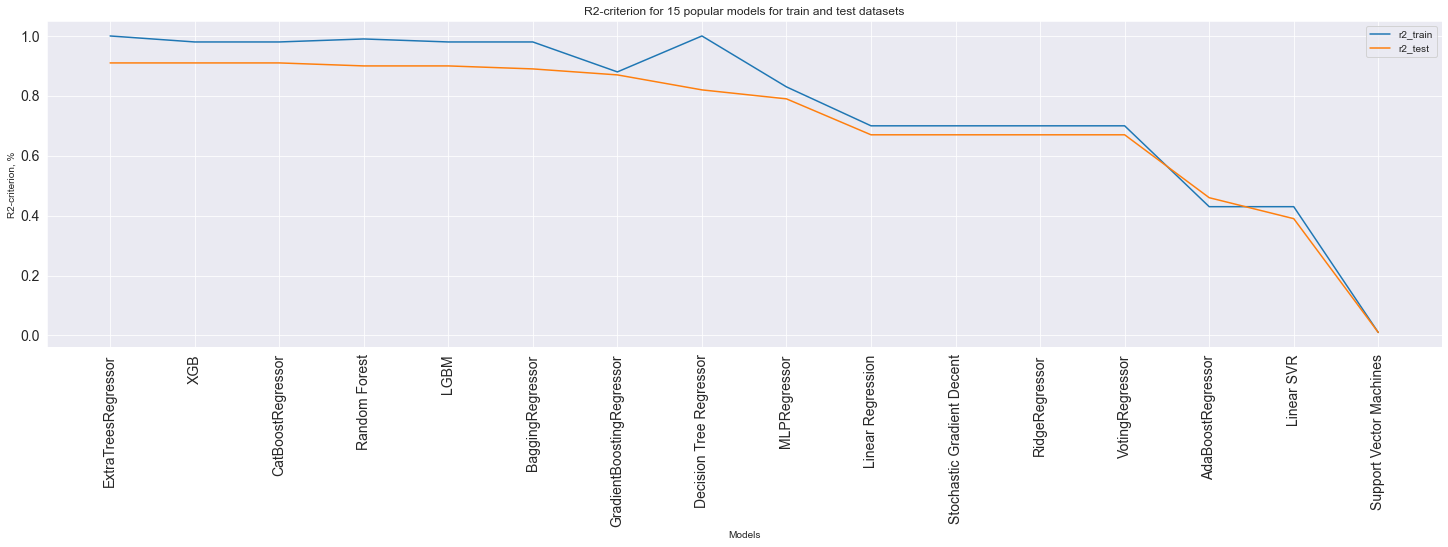

In [ ]:
models_r2 = models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

# Plot
plt.figure(figsize=[25,6])
xx = models_r2['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models_r2['r2_train'], label = 'r2_train')
plt.plot(xx, models_r2['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [ ]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


Model  r2_train  r2_test  d_train  d_test  \
8                         LGBM      0.98     0.90     0.06    0.11   
12         ExtraTreesRegressor      1.00     0.91     0.00    0.12   
6                Random Forest      0.99     0.90     0.04    0.12   
7                          XGB      0.98     0.91     0.09    0.12   
15           CatBoostRegressor      0.98     0.91     0.10    0.12   
11            BaggingRegressor      0.98     0.89     0.05    0.13   
5      Decision Tree Regressor      1.00     0.82     0.00    0.17   
9    GradientBoostingRegressor      0.88     0.87     0.18    0.18   
3                 MLPRegressor      0.83     0.79     0.19    0.20   
0            Linear Regression      0.70     0.67     0.27    0.26   
10              RidgeRegressor      0.70     0.67     0.27    0.26   
14             VotingRegressor      0.70     0.67     0.27    0.26   
4   Stochastic Gradient Decent      0.70     0.67     0.27    0.27   
2                   Linear SVR      0.43     0.39     0.30    0.31   
1      Support Vector Machines      0.01     0.01     0.49    0.50   
13           AdaBoostRegressor      0.43     0.46     0.61    0.60   

    rmse_train  rmse_test  
8     2,111.92   5,762.72  
12       27.44   5,583.14  
6     1,916.11   5,666.95  
7     2,282.61   5,593.83  
15    2,580.49   5,316.03  
11    2,270.94   6,101.28  
5        27.44   7,705.24  
9     5,952.43   6,581.33  
3     7,064.08   8,426.50  
0     9,286.46  10,533.65  
10    9,286.47  10,534.09  
14    9,289.04  10,534.64  
4     9,324.76  10,531.57  
2    12,736.33  14,205.40  
1    16,817.21  18,160.68  
13   12,827.49  13,413.78

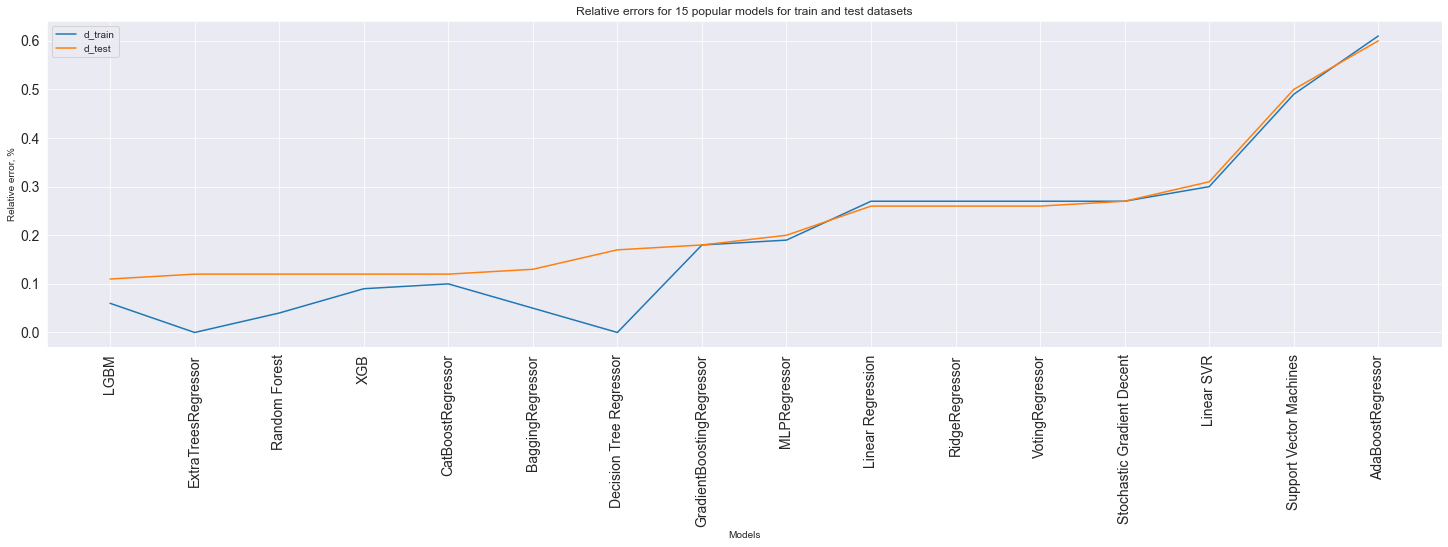

In [ ]:
models_MAE = models.sort_values(by=['d_test', 'd_train'], ascending=True)

# Plot
plt.figure(figsize=[25,6])
xx = models_MAE['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models_MAE['d_train'], label = 'd_train')
plt.plot(xx, models_MAE['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [ ]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


Model  r2_train  r2_test  d_train  d_test  \
15           CatBoostRegressor      0.98     0.91     0.10    0.12   
12         ExtraTreesRegressor      1.00     0.91     0.00    0.12   
7                          XGB      0.98     0.91     0.09    0.12   
6                Random Forest      0.99     0.90     0.04    0.12   
8                         LGBM      0.98     0.90     0.06    0.11   
11            BaggingRegressor      0.98     0.89     0.05    0.13   
9    GradientBoostingRegressor      0.88     0.87     0.18    0.18   
5      Decision Tree Regressor      1.00     0.82     0.00    0.17   
3                 MLPRegressor      0.83     0.79     0.19    0.20   
4   Stochastic Gradient Decent      0.70     0.67     0.27    0.27   
0            Linear Regression      0.70     0.67     0.27    0.26   
10              RidgeRegressor      0.70     0.67     0.27    0.26   
14             VotingRegressor      0.70     0.67     0.27    0.26   
13           AdaBoostRegressor      0.43     0.46     0.61    0.60   
2                   Linear SVR      0.43     0.39     0.30    0.31   
1      Support Vector Machines      0.01     0.01     0.49    0.50   

    rmse_train  rmse_test  
15    2,580.49   5,316.03  
12       27.44   5,583.14  
7     2,282.61   5,593.83  
6     1,916.11   5,666.95  
8     2,111.92   5,762.72  
11    2,270.94   6,101.28  
9     5,952.43   6,581.33  
5        27.44   7,705.24  
3     7,064.08   8,426.50  
4     9,324.76  10,531.57  
0     9,286.46  10,533.65  
10    9,286.47  10,534.09  
14    9,289.04  10,534.64  
13   12,827.49  13,413.78  
2    12,736.33  14,205.40  
1    16,817.21  18,160.68

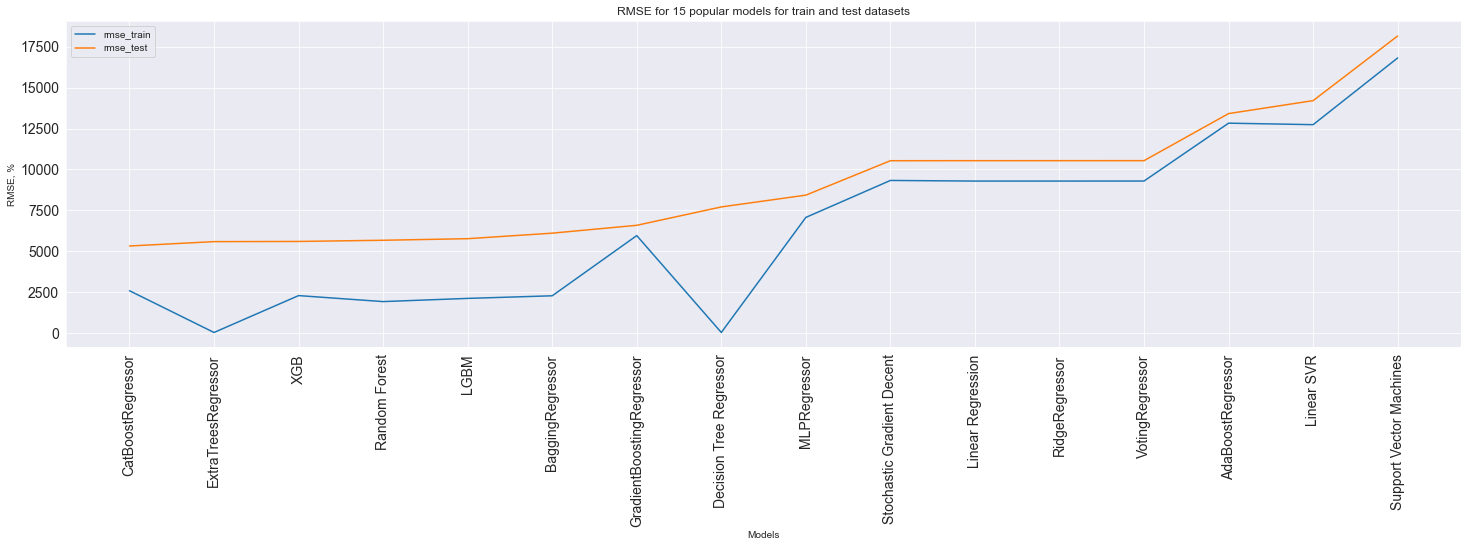

In [ ]:
models_RMSE = models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

# Plot
plt.figure(figsize=[25,6])
xx = models_RMSE['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models_RMSE['rmse_train'], label = 'rmse_train')
plt.plot(xx, models_RMSE['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

Como podemos apreciar en las valoraciones de las métricas R2, MAE y RMSE, el mejor modelo sería ExtraTreesRegressor y CatBoost para poder predecir el precio de los vehículos usado para esta población.

## 7. Implementación del modelo <a class="anchor" id="7"></a>

### 7.1 Predicción Modelo CatBoost

In [ ]:
df_used_cars.head()

make            model  \
0        SEAT           Toledo   
1     CITROEN               C1   
2        FORD  Transit Connect   
3  VOLKSWAGEN        Caravelle   
4         NaN              NaN   

                                             version    price      fuel  \
0                                   SEAT Toledo  4p.    950.0    Diésel   
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200.0  Gasolina   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851.0    Diésel   
3  VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...  19426.0    Diésel   
4                                                NaN      NaN       NaN   

     year       kms  power  doors   shift   color  photos is_professional  \
0  2000.0  227000.0    NaN    4.0  Manual   Verde     5.0           False   
1  2017.0   50071.0   82.0    5.0  Manual  Blanco     6.0            True   
2  2016.0  103000.0  100.0    4.0  Manual  Blanco    10.0            True   
3  2014.0  120000.0  140.0    4.0  Manual  Blanco     9.0            True   
4     NaN       NaN    NaN    NaN     NaN     NaN     NaN             NaN   

                             dealer   province  
0  0f4bb8455d27349b8273109b66a847f3    Navarra  
1                     Autos Raymara   Tenerife  
2                           Auto 96  Barcelona  
3                          Inniauto    Navarra  
4                               NaN        NaN

In [ ]:
#seleccionamos las variables que van a servir para el modelo
df_used_cars_def = df_used_cars[["make", "model","version","price","fuel","year","kms","power","doors","shift","color","photos","is_professional","dealer","province"]]

In [ ]:
#transformamos la variable "is_professional" a numérica quitando los NaN para que el Encoder trague esta variable sin problemas de formato
df_used_cars_def = df_used_cars_def.dropna(subset=['is_professional'])
df_used_cars_def["is_professional"] = df_used_cars_def["is_professional"].astype(int)
df_used_cars_def["is_professional"]

In [ ]:
#separamos las variables predictoras según categorias / numéricas y la variable a predecir
NUM_FEATS = ['year', 'kms', 'power', "doors", "photos", "is_professional"]  
CAT_FEATS = ['make', 'model', "version", 'fuel', 'shift', 'color', "dealer", "province"]  
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price' 

In [ ]:
#Preprocesamos los datos, rellenamos los nulos, escalamos las columnas numéricas y pasamos las categóricas a números. 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])  
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-10000000))
    ]) 
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, NUM_FEATS), 
    ('cat', categorical_transformer, CAT_FEATS)
    ])

In [ ]:
#Hacemos un pipeline para el modelo donde cargamos el preprocesamiento y el modelo, en este caso un RandomForest  
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor())
    ])

In [ ]:
#Dividimos el dataset aleatoriamente en dos, una parte para entrenar y la otra para validar el resultado.
usedcars_train, usedcars_test = train_test_split(df_used_cars_def, random_state=5) 

In [ ]:
#Entrenamos del modelo 
model1.fit(usedcars_train[FEATS], usedcars_train[TARGET])

17	total: 12.8s	remaining: 7.38s
635:	learn: 3078.0225917	total: 12.9s	remaining: 7.37s
636:	learn: 3075.8979067	total: 12.9s	remaining: 7.37s
637:	learn: 3073.9802837	total: 13s	remaining: 7.36s
638:	learn: 3073.0771670	total: 13s	remaining: 7.35s
639:	learn: 3071.8825234	total: 13s	remaining: 7.34s
640:	learn: 3069.7614244	total: 13.1s	remaining: 7.32s
641:	learn: 3068.9682989	total: 13.1s	remaining: 7.3s
642:	learn: 3067.9762095	total: 13.1s	remaining: 7.28s
643:	learn: 3066.8666440	total: 13.1s	remaining: 7.25s
644:	learn: 3065.3876095	total: 13.2s	remaining: 7.25s
645:	learn: 3063.7314674	total: 13.2s	remaining: 7.23s
646:	learn: 3063.0416857	total: 13.2s	remaining: 7.21s
647:	learn: 3062.2611328	total: 13.2s	remaining: 7.18s
648:	learn: 3060.7958680	total: 13.3s	remaining: 7.17s
649:	learn: 3058.3129687	total: 13.3s	remaining: 7.15s
650:	learn: 3056.9441213	total: 13.3s	remaining: 7.12s
651:	learn: 3055.5401642	total: 13.3s	remaining: 7.1s
652:	learn: 3053.4448416	total: 13.3s	re

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'kms', 'power',
                                                   'doors', 'photos',
                                                   'is_professional']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
      

In [ ]:
#Predecimos el precio  
y_test1 = model1.predict(usedcars_test[FEATS]) 
y_train1 = model1.predict(usedcars_train[FEATS]) 

In [ ]:
#Vemos el error con al métrica del error cuadrático medio.  
print(f"Error cuadrático medio del test (MSE): {mean_squared_error(y_pred=y_test1, y_true=usedcars_test[TARGET], squared=False).round(2)}€")  
print(f"Error cuadrático medio del train (MSE): {mean_squared_error(y_pred=y_train1, y_true=usedcars_train[TARGET], squared=False).round(2)}€")
print(f"Error cuadrático medio del test (RMSE): {math.sqrt(mean_squared_error(y_pred=y_test1, y_true=usedcars_test[TARGET], squared=False)).__round__(2)}€")
print(f"Error cuadrático medio del train (RMSE): {math.sqrt(mean_squared_error(y_pred=y_train1, y_true=usedcars_train[TARGET], squared=False)).__round__(2)}€")
print(f"R2 del test: {r2_score(y_test1, usedcars_test[TARGET])}")
print(f"R2 del train: {r2_score(y_train1, usedcars_train[TARGET])}")

Error cuadrático medio del test (MSE): 5616.86€
Error cuadrático medio del train (MSE): 2718.9€
Error cuadrático medio del test (RMSE): 74.95€
Error cuadrático medio del train (RMSE): 52.14€
R2 del test: 0.8679049431205231
R2 del train: 0.970684260577454


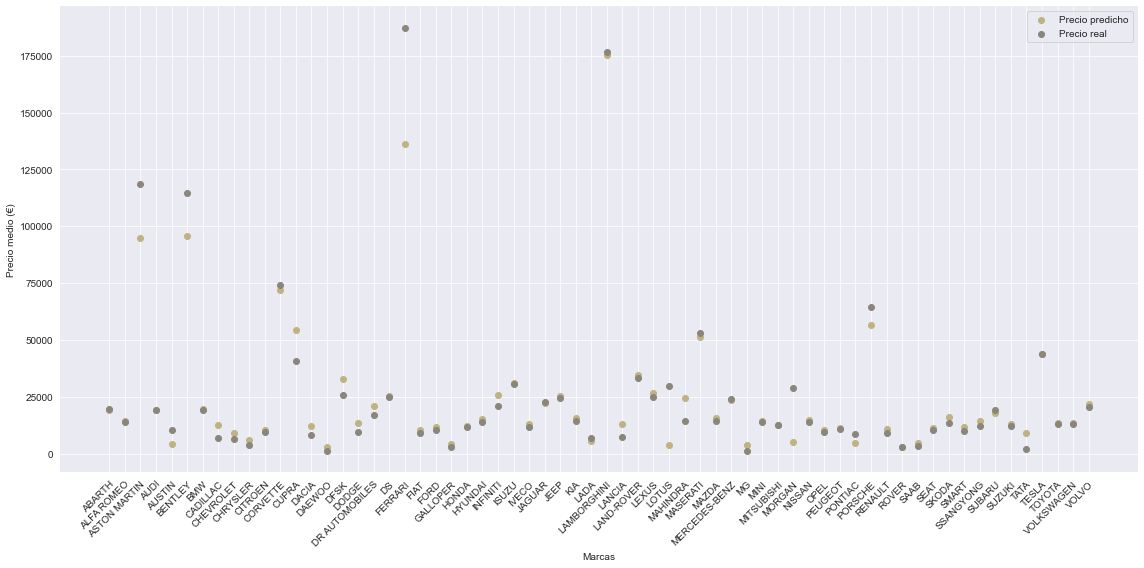

In [ ]:
#Representamos el valor medio por marca para diferenciar el predicho con el real.  
coches_plot = usedcars_test.loc[:, ['make', 'price']]  
coches_plot.loc[:, 'price_model'] = y_test1  
coches_plot = coches_plot.groupby('make', as_index=False).mean()  
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))  
ax.scatter(coches_plot['make'], coches_plot['price_model'], c=['#c0b283'])  
ax.scatter(coches_plot['make'], coches_plot['price'], c='#8a867b')  
ax.set_xlabel('Marcas')  
ax.set_ylabel('Precio medio (€)')  
ax.legend(['Precio predicho', 'Precio real'])  
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False) 
ax.spines["top"].set_visible(False)  
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.tight_layout() 
plt.show()

In [ ]:
#variación precio real vs predicho según fabricante
coches_plot["%"] = abs(coches_plot["price_model"] / coches_plot["price"] - 1) * 100
coches_plot.sort_values("%", ascending=True).head(20)

make          price    price_model         %
51          ROVER    3033.333333    3031.265160  0.068182
60          TESLA   43949.500000   43916.446779  0.075207
32    LAMBORGHINI  176633.000000  175203.713485  0.809184
42           MINI   14021.288136   14135.578542  0.815121
0          ABARTH   19392.500000   19209.568617  0.943310
26          ISUZU   30650.000000   30982.504926  1.084845
18             DS   24845.000000   25129.990767  1.147075
40  MERCEDES-BENZ   23923.440710   23634.096589  1.209459
6             BMW   19182.337284   19437.468949  1.330034
3            AUDI   19006.539227   19264.127704  1.355262
1      ALFA ROMEO   13939.105263   14146.971934  1.491248
28         JAGUAR   22669.476923   22231.081253  1.933859
43     MITSUBISHI   12386.370370   12684.074955  2.403485
62     VOLKSWAGEN   12997.053650   13344.092723  2.670136
11       CORVETTE   74000.000000   71754.801721  3.034052
38       MASERATI   52828.000000   51209.409007  3.063888
29           JEEP   24317.542857   25096.556956  3.203507
47        PEUGEOT   10899.390184   11255.936529  3.271250
34     LAND-ROVER   33232.272152   34541.601319  3.939933
23          HONDA   11665.008403   12129.047045  3.978039

### 7.2 Predicción Modelo ExtraTreesRegressor

In [ ]:
#Hacemos un pipeline para el modelo donde cargamos el preprocesamiento y el modelo, en este caso un RandomForest  
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor())
    ])

In [ ]:
#Entrenamos del modelo 
model2.fit(usedcars_train[FEATS], usedcars_train[TARGET])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'kms', 'power',
                                                   'doors', 'photos',
                                                   'is_professional']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
      

In [ ]:
#Predecimos el precio  
y_test2 = model2.predict(usedcars_test[FEATS]) 
y_train2 = model2.predict(usedcars_train[FEATS]) 

In [ ]:
#Vemos el error con al métrica del error cuadrático medio.  
print(f"Error cuadrático medio del test (MSE): {mean_squared_error(y_pred=y_test2, y_true=usedcars_test[TARGET], squared=False).round(2)}€")  
print(f"Error cuadrático medio del train (MSE): {mean_squared_error(y_pred=y_train2, y_true=usedcars_train[TARGET], squared=False).round(2)}€")
print(f"Error cuadrático medio del test (RMSE): {math.sqrt(mean_squared_error(y_pred=y_test2, y_true=usedcars_test[TARGET], squared=False)).__round__(2)}€")
print(f"Error cuadrático medio del train (RMSE): {math.sqrt(mean_squared_error(y_pred=y_train2, y_true=usedcars_train[TARGET], squared=False)).__round__(2)}€")
print(f"R2 del test: {r2_score(y_test2, usedcars_test[TARGET])}")
print(f"R2 del train: {r2_score(y_train2, usedcars_train[TARGET])}")

Error cuadrático medio del test (MSE): 5470.19€
Error cuadrático medio del train (MSE): 4.39€
Error cuadrático medio del test (RMSE): 73.96€
Error cuadrático medio del train (RMSE): 2.1€
R2 del test: 0.8673298302437833
R2 del train: 0.9999999273558904


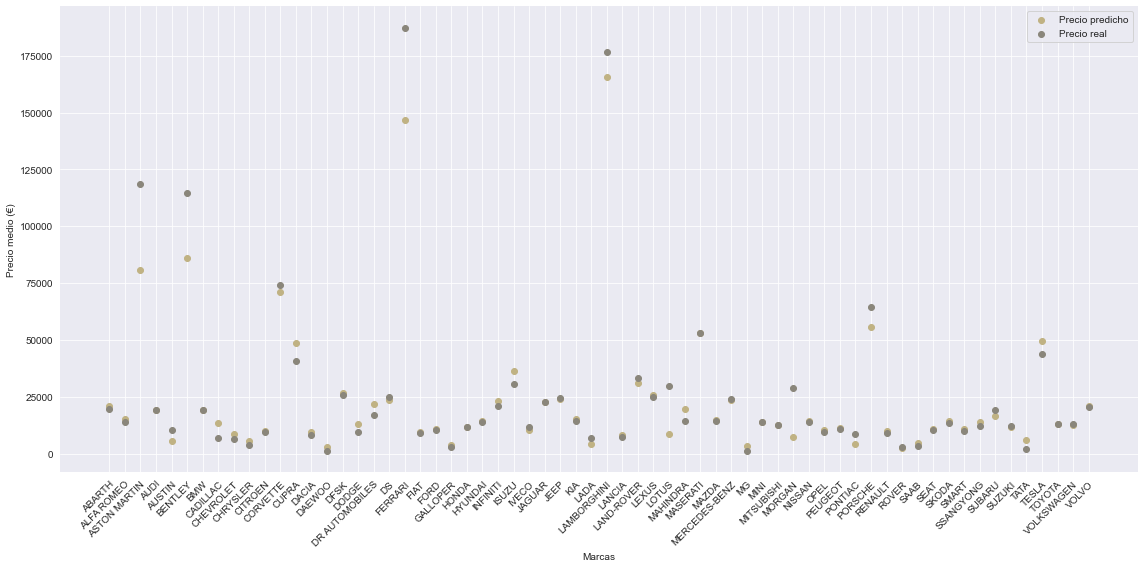

In [ ]:
#Representamos el valor medio por marca para diferenciar el predicho con el real.  
coches_plot = usedcars_test.loc[:, ['make', 'price']]  
coches_plot.loc[:, 'price_model'] = y_test2  
coches_plot = coches_plot.groupby('make', as_index=False).mean()  
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))  
ax.scatter(coches_plot['make'], coches_plot['price_model'], c=['#c0b283'])  
ax.scatter(coches_plot['make'], coches_plot['price'], c='#8a867b')  
ax.set_xlabel('Marcas')  
ax.set_ylabel('Precio medio (€)')  
ax.legend(['Precio predicho', 'Precio real'])  
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False) 
ax.spines["top"].set_visible(False)  
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.tight_layout() 
plt.show()

In [ ]:
#variación precio real vs predicho según fabricante
coches_plot["%"] = abs(coches_plot["price_model"] / coches_plot["price"] - 1) * 100
coches_plot.sort_values("%", ascending=True).head(20)

make     price  price_model    %
3            AUDI 19,006.54    18,980.02 0.14
6             BMW 19,182.34    19,150.96 0.16
28         JAGUAR 22,669.48    22,715.86 0.20
58         SUZUKI 11,923.12    11,896.53 0.22
42           MINI 14,021.29    13,964.71 0.40
23          HONDA 11,665.01    11,577.10 0.75
38       MASERATI 52,828.00    52,347.97 0.91
29           JEEP 24,317.54    23,990.61 1.34
61         TOYOTA 12,815.04    12,998.62 1.43
63          VOLVO 20,327.00    20,719.20 1.93
62     VOLKSWAGEN 12,997.05    12,743.60 1.95
47        PEUGEOT 10,899.39    11,116.07 1.99
43     MITSUBISHI 12,386.37    12,645.37 2.09
40  MERCEDES-BENZ 23,923.44    23,365.35 2.33
45         NISSAN 13,752.41    14,094.97 2.49
35          LEXUS 24,950.65    25,682.99 2.94
24        HYUNDAI 13,915.74    14,394.12 3.44
15           DFSK 25,545.00    26,558.73 3.97
18             DS 24,845.00    23,832.36 4.08
30            KIA 14,407.83    15,042.24 4.40

Como podemos apreciar, tenemos 2 modelos que predicen el precio del parque de vehículos usados con gran precisión. El primero que basa su éxito en el algoritmo CatBoost, parece que acierta con mayor precisión, fabricantes con menos histórico respecto al segundo modelo que para fabricantes con mayor número de vehículos, se aproxima con gran acierto al precio real.

Por tanto, si quisiera predecir vehículos de modo genérico, podría optar por el modelo ExtraTrees pero si mi modelización estuvise destinada a fabricantes con menos histórico, eligiría el CatBoost.